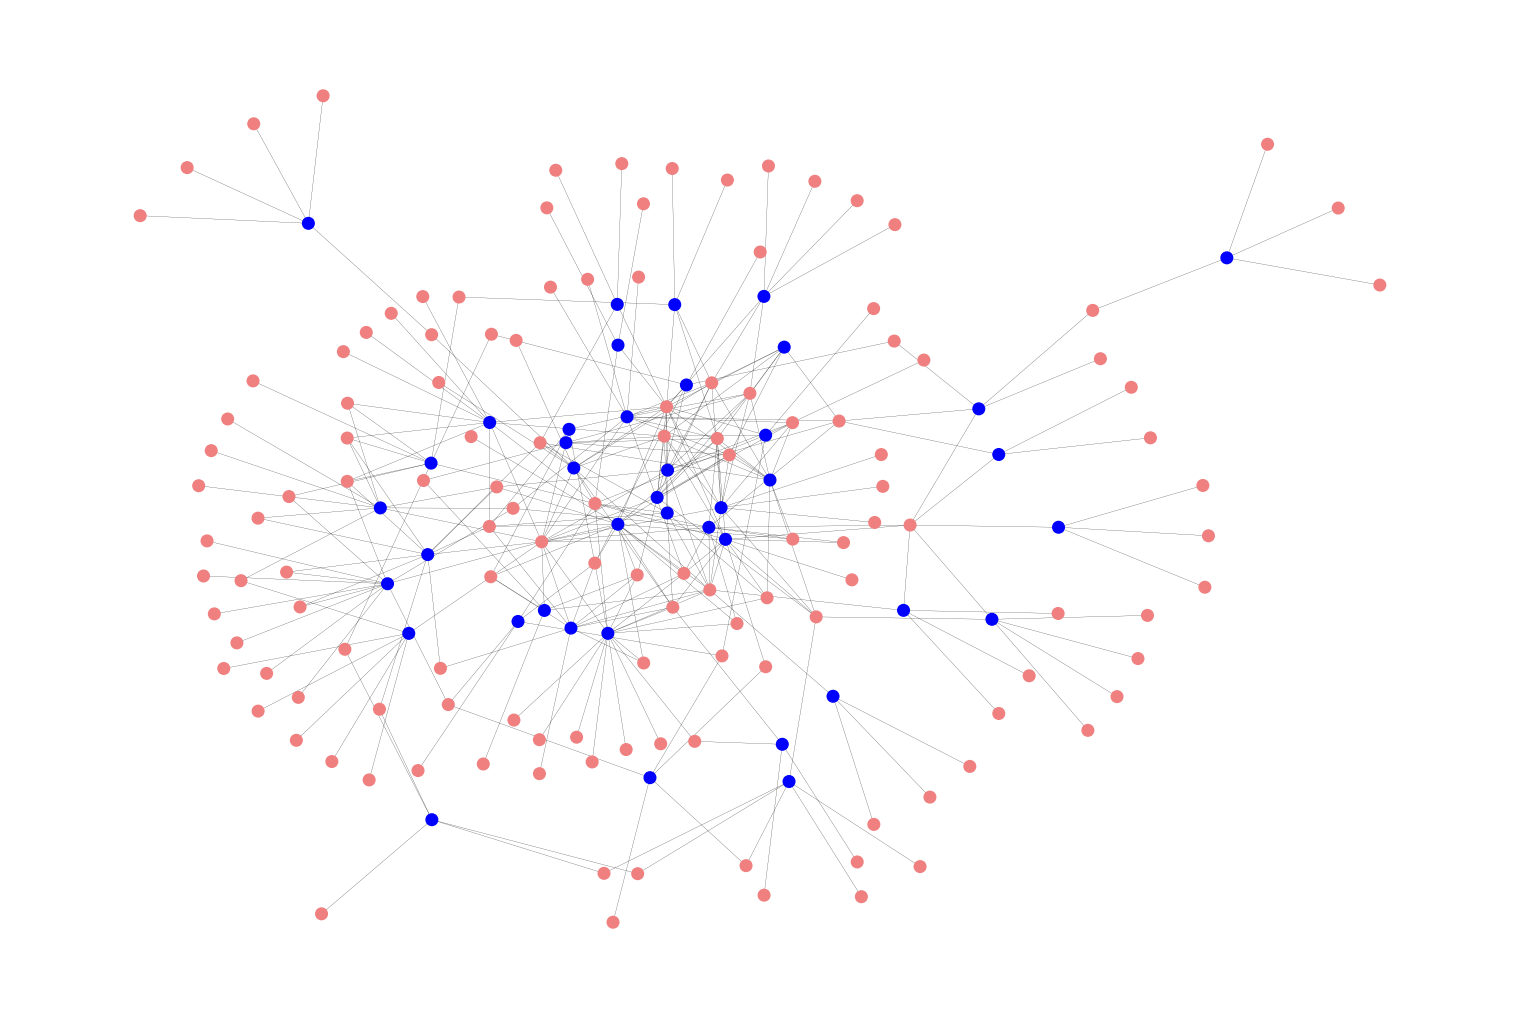

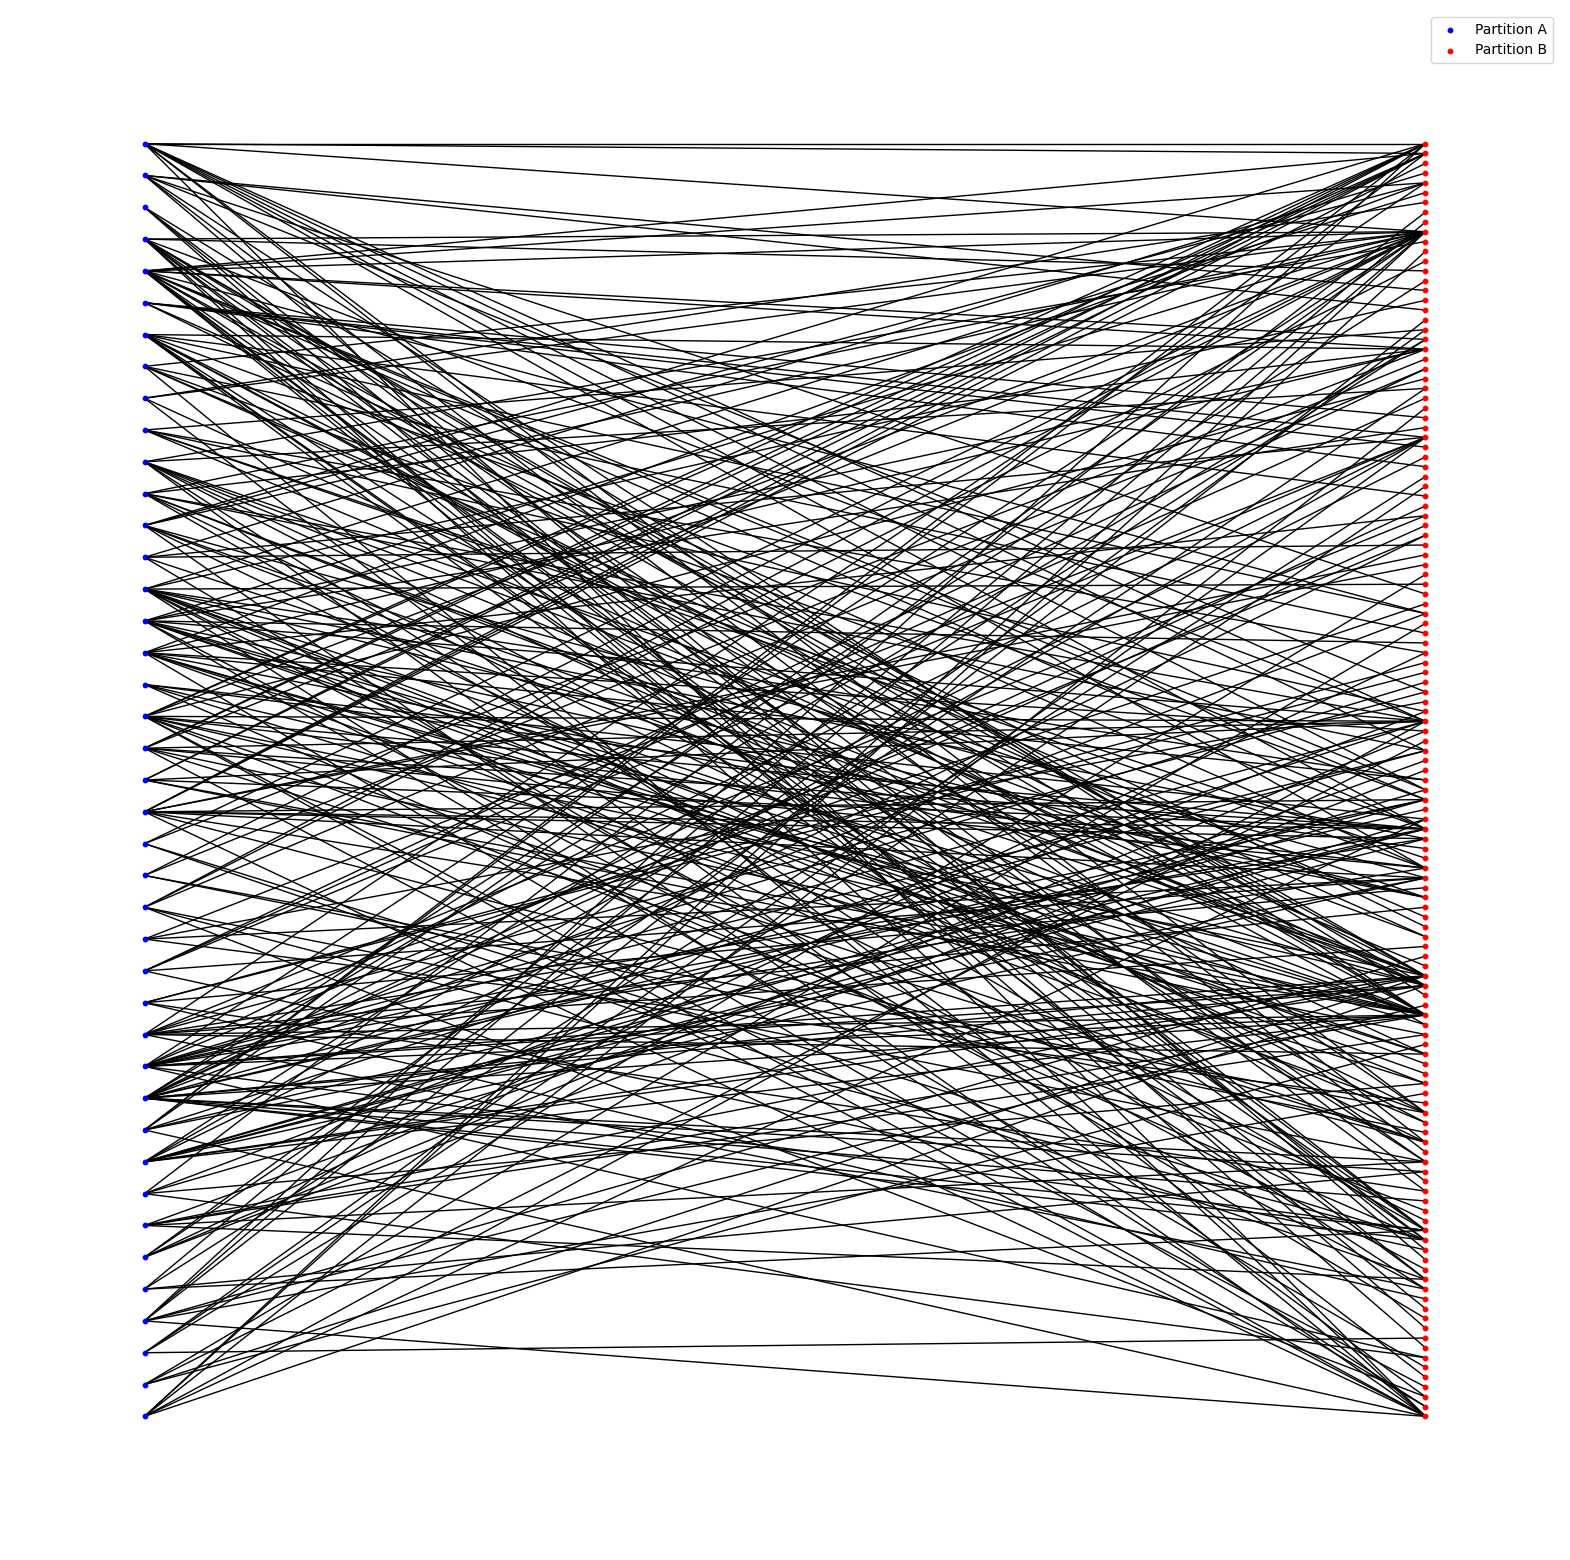

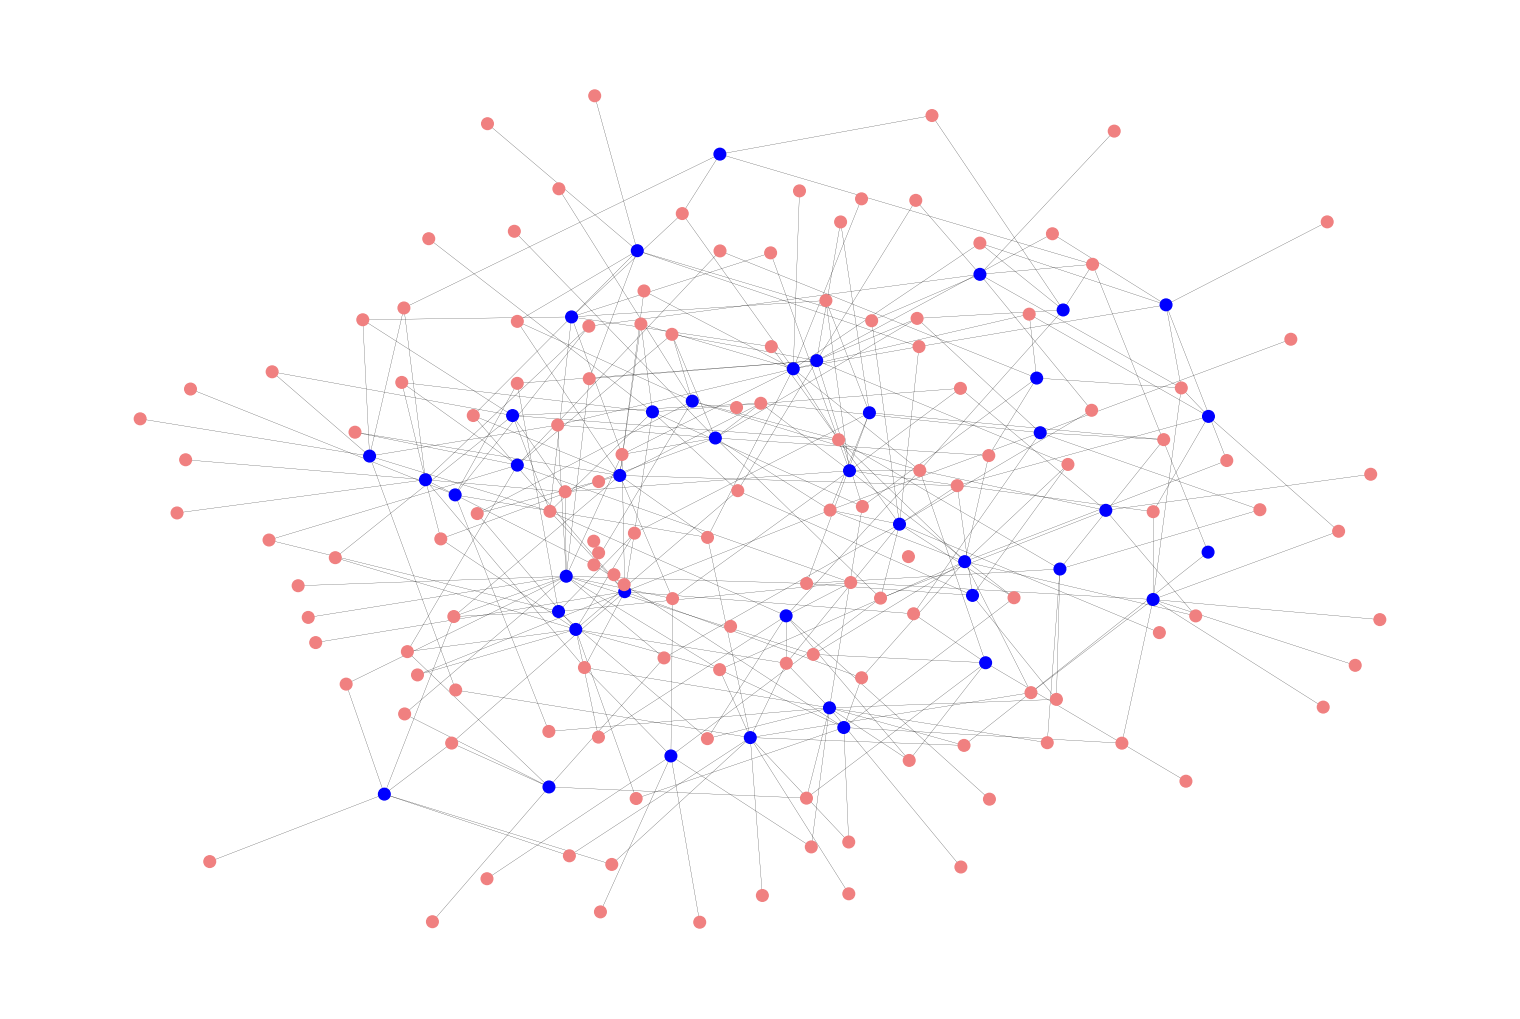

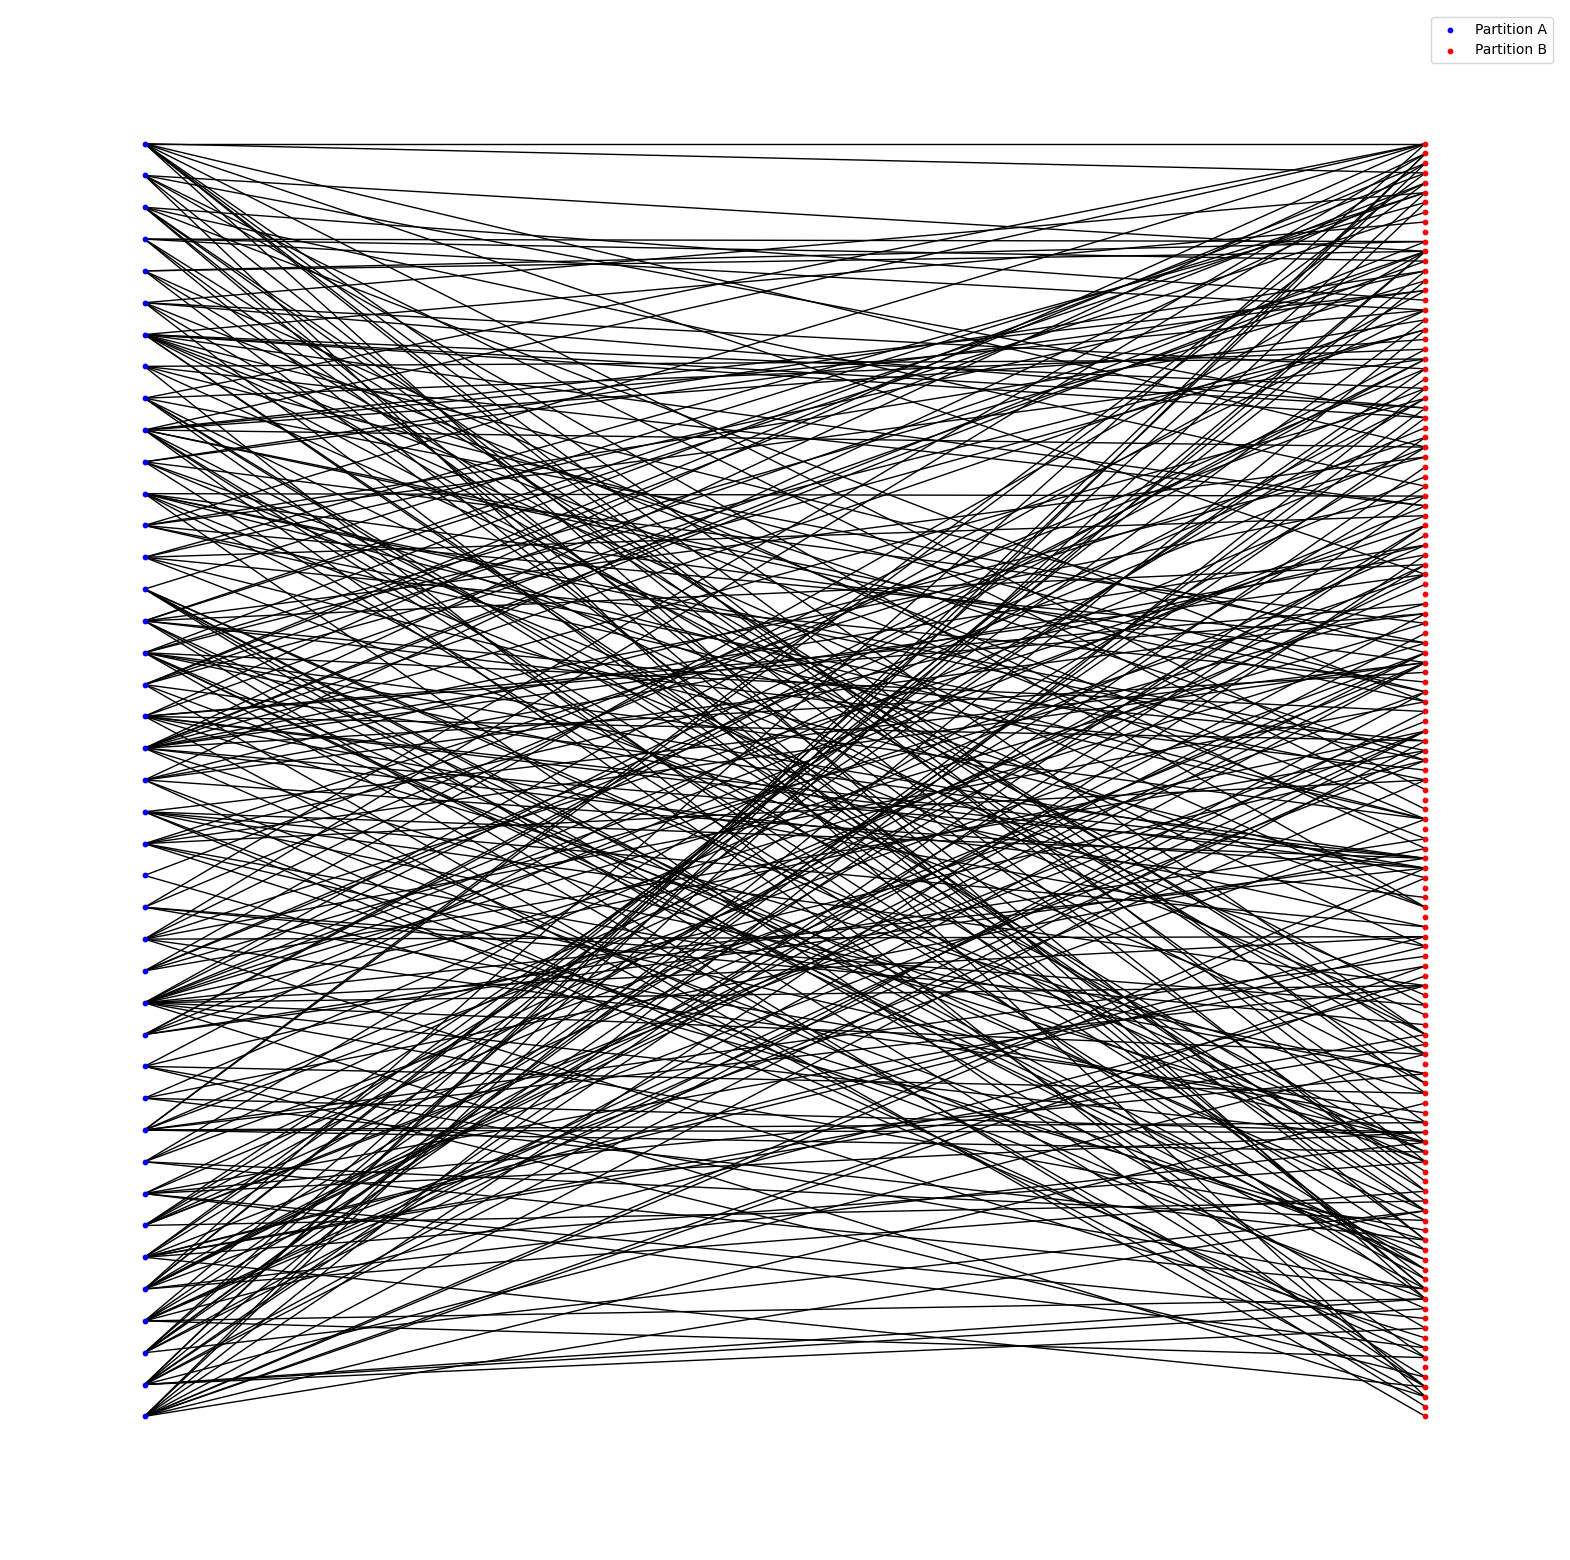

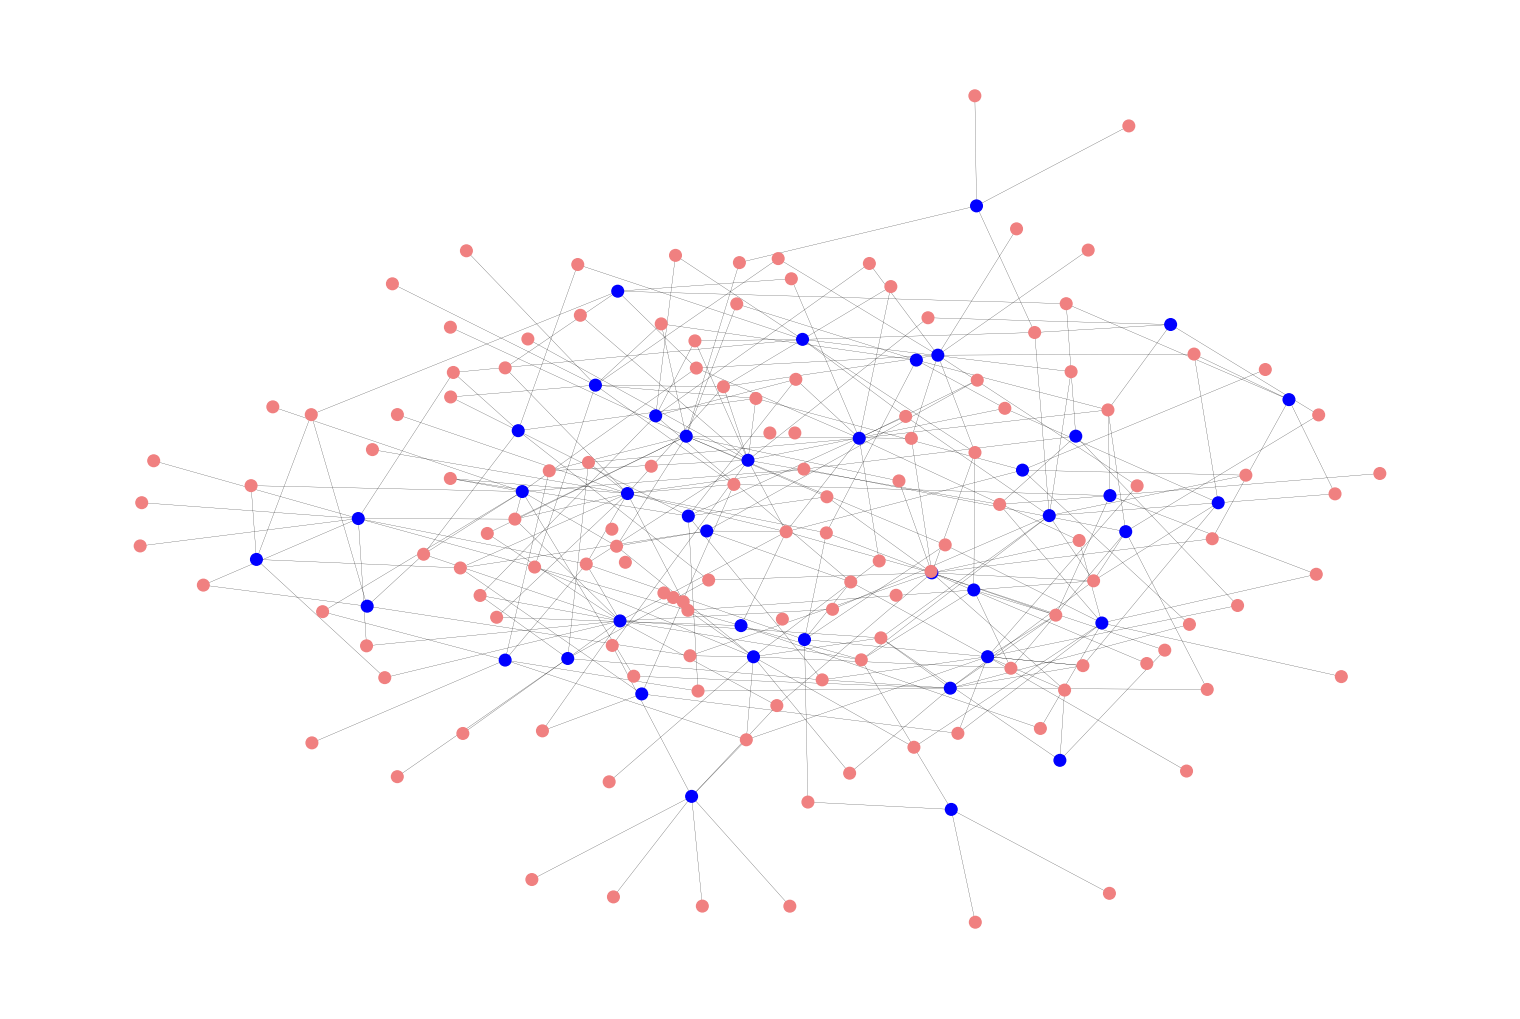

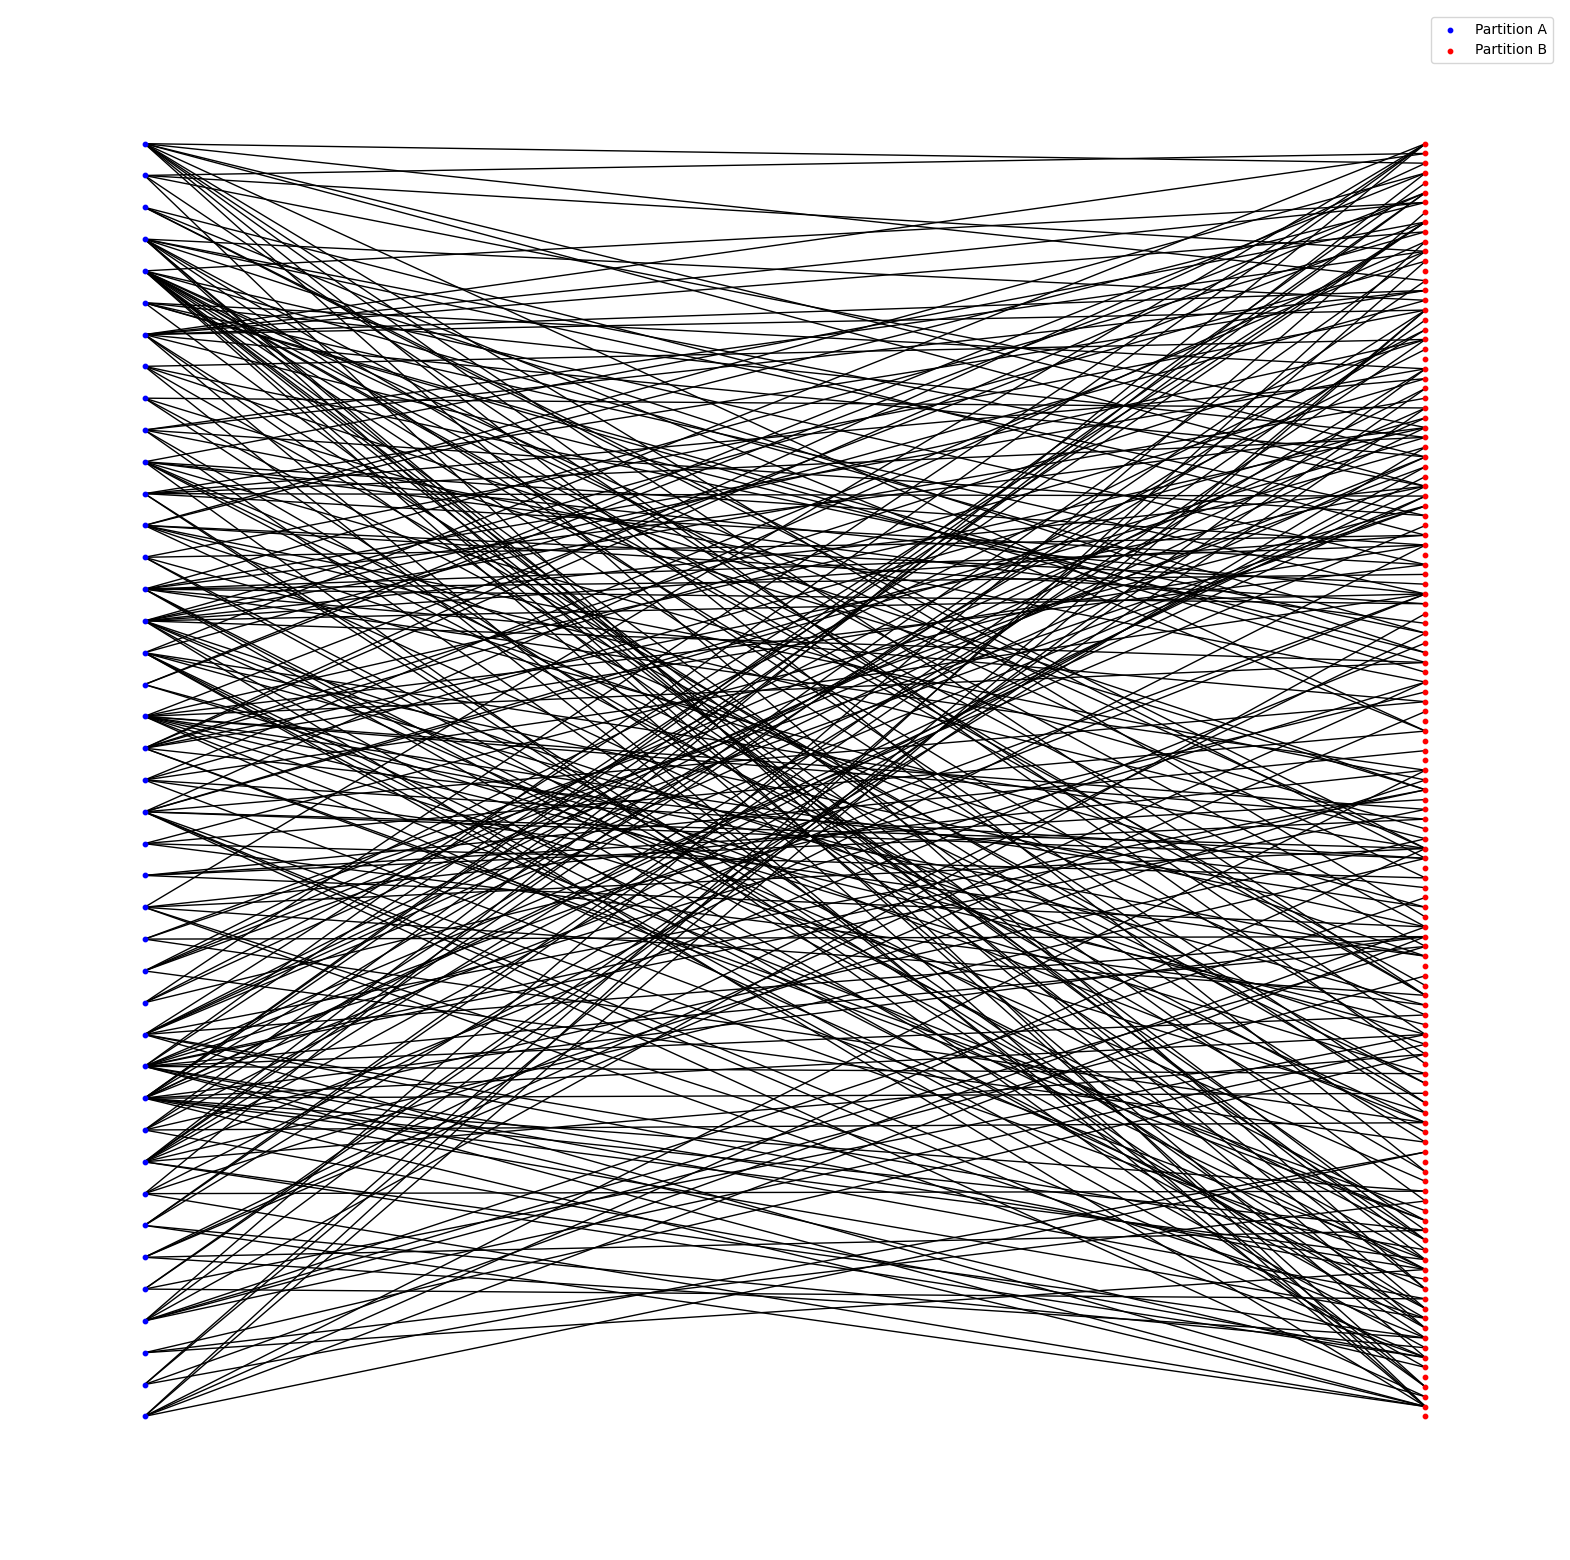

In [1]:
import networkx as nx
import pandas as pd
import random
from scripts.get_graph import get_graph
from scripts.plots import plotGraph
from scripts.plots import plotBipartiteGraph
import matplotlib.pyplot as plt

def null_model_1(original_graph):
    random_graph = original_graph.copy()
    
    # Extract edges from the original graph
    edges = list(original_graph.edges())
    
    # Identify nodes in each partition (assuming 'bipartite' node attribute is present)
    partition_A = [node for node in original_graph.nodes if original_graph.nodes[node]['bipartite'] == 0]
    partition_B = [node for node in original_graph.nodes if original_graph.nodes[node]['bipartite'] == 1]
    
    # Shuffle the numbers within each partition
    random.shuffle(partition_A)
    random.shuffle(partition_B)
    
    # Create a new list of tuples by pairing up the shuffled numbers
    shuffled_edges = [(random.choice(partition_A), random.choice(partition_B)) for _ in range(len(edges))]
    
    # Remove all edges from the random graph and add shuffled edges
    random_graph.remove_edges_from(list(random_graph.edges()))
    random_graph.add_edges_from(shuffled_edges)
    
    return random_graph


def null_model_2(original_graph):
    random_graph = original_graph.copy()
    # Get nodes in partition A
    partition_A = {node for node, bipartite in original_graph.nodes(data='bipartite') if bipartite == 0}
    # Get nodes in partition B
    partition_B = {node for node, bipartite in original_graph.nodes(data='bipartite') if bipartite == 1}

    for node_A in partition_A:
        # Get neighbors in partition B
        neighbors_B = list(random_graph.neighbors(node_A))

        # Randomly shuffle the neighbors
        random.shuffle(neighbors_B)

        # Remove existing edges and add new edges to shuffled nodes in B
        for neighbor_B in neighbors_B:
            edge_to_remove = (node_A, neighbor_B)
            random_graph.remove_edge(*edge_to_remove)

            # Randomly select a node in B
            random_node_B = random.choice(list(partition_B))
            # Add the edge to the randomly selected node in B
            random_graph.add_edge(node_A, random_node_B)
    
    return random_graph


# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

num_rows, num_cols = adjacency_matrix.shape

network = get_graph(adjacency_matrix)

original_graph = get_graph(adjacency_matrix)

plotGraph(original_graph)
plotBipartiteGraph(original_graph)

randomized_graph_1 = null_model_1(original_graph)
plotGraph(randomized_graph_1)
plotBipartiteGraph(randomized_graph_1)

randomized_graph_2 = null_model_2(original_graph)
plotGraph(randomized_graph_2)
plotBipartiteGraph(randomized_graph_2)

In [ ]:
import random

def null_model_2(network):
    # Get the set of nodes in partition A
    nodes_A = set(node for node, bipartite in network.nodes(data='bipartite') if bipartite == 0)
    nodes_B = [node for node, data in network.nodes(data=True) if data['bipartite'] == 1]

    # Iterate through the nodes in partition A
    for node in nodes_A:
        neighbors_B = list(original_graph.neighbors(node))
        for el in neighbors_B:
            el = random.randint(len(nodes_A), len(nodes_B))
    
    return network


# Example usage:
original_lists = [
    [85, 102, 112],
    [79, 86, 110, 122],
    [49, 127, 136, 141],
    [41, 74, 83, 88, 153, 162, 171]
]

# Apply the function
result = random_assignment_and_shuffle(original_lists)

# Display the result
for sublist in result:
    print(sublist)